In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np



In [3]:
# Open the file
dataset = xr.open_dataset('C:/Users/marta/Desktop/Thesis/Climate-Change-Impacted-Solar-Energy-Generation/rsds_3hr_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001010130-201412312230.nc')


# Inspect dataset to confirm variable and coordinates
print(dataset)

# Select the 'rsds' variable for the first time step
rsds = dataset['rsds']

# Extract longitude and latitude
lon = dataset['lon']
lat = dataset['lat']

# Assuming rsds is a 3D array with dimensions (time, lat, lon)
# Select the time slice number 100
rsds_slice = rsds.isel(time=100)

# Create DataArray with correct dimensions
rsds= xr.DataArray(
    rsds_slice, 
    dims=['lat', 'lon'], 
    coords={'lat': lat, 'lon': lon}
)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 14608, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 117kB 2010-01-01T01:30:00 ... 2014-12-31...
  * lat        (lat) float64 768B -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 234kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsds       (time, lat, lon) float32 1GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            rsds
    variant_label:          r1i1p1f1
    license

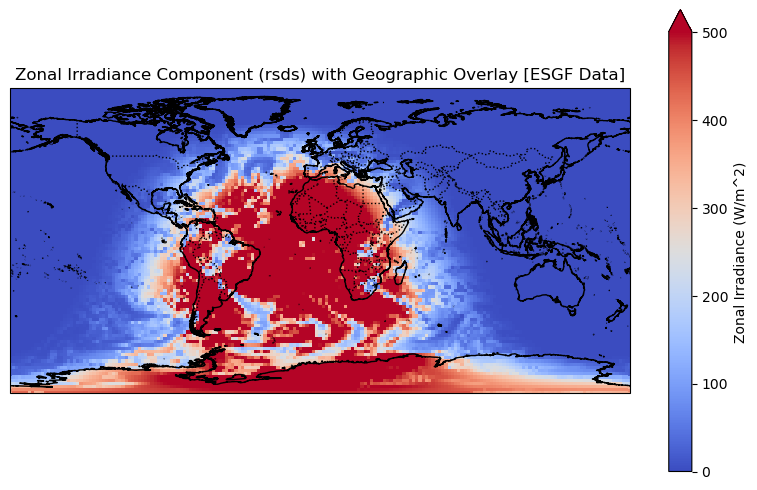

In [4]:
# Set up the plot with PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the zonal solar component, adjusting the color scale to range from 0 to 1000
solar_plot = rsds.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    vmin=0,  # Minimum value of the color scale
    vmax=500,  # Maximum value of the color scale
    cbar_kwargs={'label': 'Zonal Irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set map extent based on data coordinates
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Title and labels
plt.title('Zonal Irradiance Component (rsds) with Geographic Overlay [ESGF Data]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [23]:
# --- Step 1: Define the European Region with atlite Cutout ---
cutout = atlite.Cutout(
    path='europe_solar',
    module='era5',
    x=slice(-10, 20),  # Longitude: West Portugal to East Italy
    y=slice(35, 70),   # Latitude: South Spain to North Norway
    time=slice("2011-05","2011-06")  # Example time (matches dataset)
)

# Prepare the cutout (atlite requires this for analysis)
cutout.prepare()
print(cutout.data)



<xarray.Dataset> Size: 812MB
Dimensions:               (x: 121, y: 141, time: 744)
Coordinates:
  * x                     (x) float64 968B -10.0 -9.75 -9.5 ... 19.5 19.75 20.0
  * y                     (y) float64 1kB 35.0 35.25 35.5 ... 69.5 69.75 70.0
  * time                  (time) datetime64[ns] 6kB 2011-05-01 ... 2011-05-31...
    lon                   (x) float64 968B dask.array<chunksize=(121,), meta=np.ndarray>
    lat                   (y) float64 1kB dask.array<chunksize=(141,), meta=np.ndarray>
Data variables: (12/15)
    height                (y, x) float32 68kB dask.array<chunksize=(141, 121), meta=np.ndarray>
    wnd100m               (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    roughness             (time, y, x) float32 

c:\Users\marta\anaconda3\envs\atlite_cmip6_2025\Lib\site-packages\atlite\cutout.py:156: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [6]:
print(cutout.data.data_vars)


Data variables:
    height                (y, x) float32 68kB dask.array<chunksize=(141, 121), meta=np.ndarray>
    wnd100m               (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    roughness             (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    influx_toa            (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    influx_direct         (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    influx_diffuse        (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    albedo                (time, y, x) float32 51MB dask.array<chunksize=(100, 141, 121), meta=np.ndarray>
    solar_altitude        (time,

<xarray.DataArray 'influx_direct' (time: 744, y: 141, x: 121)> Size: 51MB
dask.array<xarray-influx_direct, shape=(744, 141, 121), dtype=float32, chunksize=(100, 141, 121), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 968B -10.0 -9.75 -9.5 -9.25 ... 19.25 19.5 19.75 20.0
  * y        (y) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
  * time     (time) datetime64[ns] 6kB 2011-05-01 ... 2011-05-31T23:00:00
    lon      (x) float64 968B dask.array<chunksize=(121,), meta=np.ndarray>
    lat      (y) float64 1kB dask.array<chunksize=(141,), meta=np.ndarray>
Attributes:
    units:    W m**-2
    module:   era5
    feature:  influx
<xarray.DataArray 'time' (time: 744)> Size: 6kB
array(['2011-05-01T00:00:00.000000000', '2011-05-01T01:00:00.000000000',
       '2011-05-01T02:00:00.000000000', ..., '2011-05-31T21:00:00.000000000',
       '2011-05-31T22:00:00.000000000', '2011-05-31T23:00:00.000000000'],
      shape=(744,), dtype='datetime64[ns]')
Coordinates:
  * t

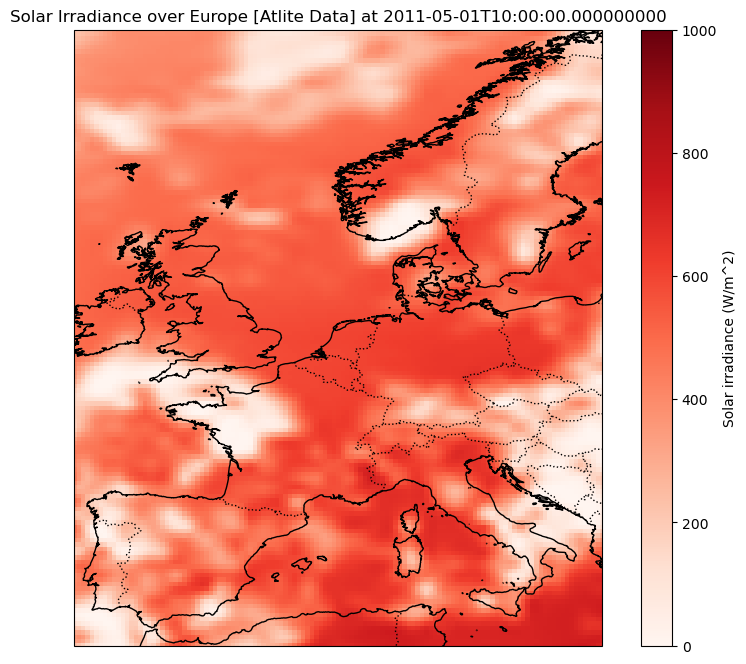

In [7]:

# Calculate solar irradiance
direct_irradiance = cutout.data.influx_direct
solar_irradiance = direct_irradiance
time = cutout.data.time
specific_time = "2011-05-01T10:00:00.000000000"

solar_irradiance=solar_irradiance.assign_coords(lon=(((solar_irradiance.lon + 180) % 360) - 180))
solar_irradiance=solar_irradiance.assign_coords(lat=(((solar_irradiance.lat + 180) % 360) - 180))

print(solar_irradiance)
print(time)

# Select the closest time to specific_time
closest_time = solar_irradiance.sel(time=specific_time, method='nearest').time.values
print(f"Closest time to {specific_time} is {closest_time}")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Select solar irradiance for the closest time
solar_irradiance.sel(time=closest_time).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds',  # Red color scale for solar irradiance
    vmin=0,  # Minimum value of the color scale
    vmax=1000,  # Maximum value of the color scale
    cbar_kwargs={'label': 'Solar irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([-10, 20, 35, 70], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Solar Irradiance over Europe [Atlite Data] at {closest_time}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Solar irradiance values at 2011-05-01T10:30:00:
[[3.9062500e-03 3.9062500e-03 3.9062500e-03 ... 3.9062500e-03
  3.9062500e-03 3.9062500e-03]
 [3.9062500e-03 3.9062500e-03 3.9062500e-03 ... 3.9062500e-03
  3.9062500e-03 3.9062500e-03]
 [3.9062500e-03 3.9062500e-03 3.9062500e-03 ... 3.9062500e-03
  3.9062500e-03 3.9062500e-03]
 ...
 [2.4481641e+02 2.5905078e+02 2.5891016e+02 ... 2.4891016e+02
  2.5005078e+02 2.4930078e+02]
 [2.5662891e+02 2.5756641e+02 2.5341016e+02 ... 2.5272266e+02
  2.5370703e+02 2.5420703e+02]
 [2.3391016e+02 2.2766016e+02 2.2350391e+02 ... 2.2517578e+02
  2.2466016e+02 2.2469141e+02]]


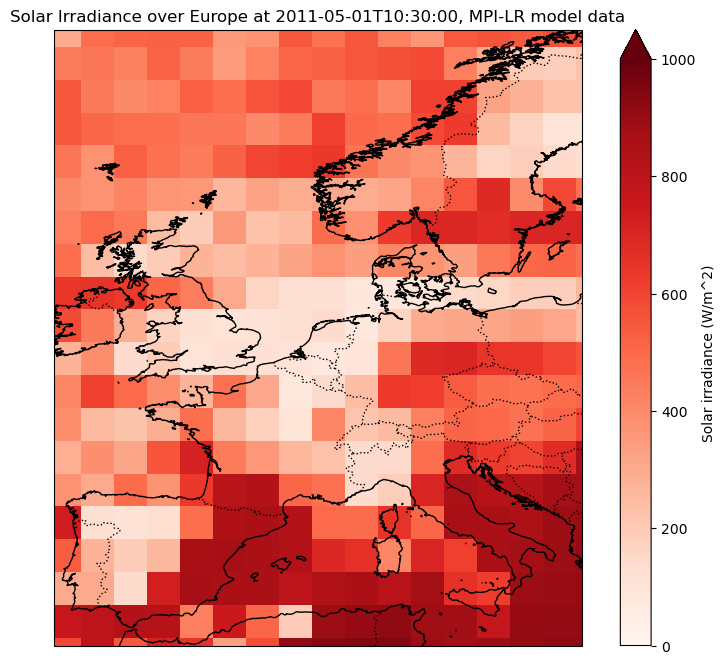

In [8]:
# Extract rsds (solar irradiance) and keep the time dimension intact
rsds = dataset['rsds']  # Ensure 'rsds' has the 'time' dimension

# Select solar irradiance for the specific time
specific_time = "2011-05-01T10:30:00"
rsds_at_time = rsds.sel(time=specific_time)

# Print the selected data values
print(f"Solar irradiance values at {specific_time}:")
print(rsds_at_time.values)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
rsds_at_time.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds', 
    vmin=0,  # Minimum value of the color scale
    vmax=1000, # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Solar irradiance (W/m^2)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent to Europe
ax.set_extent([-10, 20, 35, 70], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Solar Irradiance over Europe at {specific_time}, MPI-LR model data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



In [9]:
rsds = dataset['rsds']  # Ensure 'rsds' has the 'time' dimension


In [10]:
# Check the longitude range of your rsds_europe dataset
print("Longitude range in rsds_at_time:", rsds_at_time.lon.min().values, rsds_at_time.lon.max().values)

Longitude range in rsds_at_time: 0.0 358.125


In [11]:
# Define Europe's longitude and latitude range
europe_lon_min, europe_lon_max = -10, 20  # Approximate longitudes for Europe
europe_lat_min, europe_lat_max = 30, 70   # Approximate latitudes for Europe

# Subset the irradiance data to focus only on Europe
rsds_europe = rsds_at_time.sel(lon=slice(europe_lon_min, europe_lon_max),
                        lat=slice(europe_lat_min, europe_lat_max))  # Note: lat is usually ordered descending

In [12]:
if rsds_europe.lat[0] > rsds_europe.lat[-1]:
    rsds_europe = rsds_europe.sortby("lat")

In [13]:
# Check if longitude is within the correct range for your cutout (i.e., -10 to 20)
if rsds_europe.lon[0] > rsds_europe.lon[-1]:
    rsds_europe = rsds_europe.sortby("lon")  # Sort longitudes in ascending order if needed

In [14]:
cutout_lons = np.sort(cutout.grid.x.values)  
cutout_lats = np.sort(cutout.grid.y.values)  

In [15]:
import xarray as xr

# Step 1: Load your dataset (assuming it's already loaded as 'rsds_at_time')
# Example of loading data: rsds_at_time = xr.open_dataset('path_to_your_data.nc')
rsds_at_time = rsds_at_time.assign_coords(lon=((rsds_at_time.lon + 180) % 360 - 180))
rsds_at_time = rsds_at_time.sortby('lon')

# Step 2: Ensure longitude and latitude coordinates are sorted
rsds_at_time = rsds_at_time.sortby('lon')  # Sort longitude in increasing order
rsds_at_time = rsds_at_time.sortby('lat')  # Sort latitude in increasing order


# Step 3: Define the Europe region for longitude and latitude
europe_lon_min, europe_lon_max = -12, 22  # Longitude range for Europe
europe_lat_min, europe_lat_max = 30, 70   # Latitude range for Europe

# Step 4: Find the nearest longitude and latitude indices for the specified region
nearest_lon_min = rsds_at_time.lon.sel(lon=europe_lon_min, method="nearest")
nearest_lon_max = rsds_at_time.lon.sel(lon=europe_lon_max, method="nearest")
nearest_lat_min = rsds_at_time.lat.sel(lat=europe_lat_min, method="nearest")
nearest_lat_max = rsds_at_time.lat.sel(lat=europe_lat_max, method="nearest")

# Step 5: Subset the data using the nearest indices found above
rsds_europe = rsds_at_time.sel(
    lon=slice(nearest_lon_min, nearest_lon_max),  # Use nearest longitudes
    lat=slice(nearest_lat_min, nearest_lat_max),   # Use nearest latitudes
)

# Step 6: Check the longitude and latitude ranges in the subsetted data
print("Longitude range in rsds_europe:", rsds_europe.lon.min().values, rsds_europe.lon.max().values)
print("Latitude range in rsds_europe:", rsds_europe.lat.min().values, rsds_europe.lat.max().values)

# Now you can proceed with further steps, e.g., interpolation, plotting, etc.


Longitude range in rsds_europe: -11.25 22.5
Latitude range in rsds_europe: 30.77674406172325 69.94608064698343


In [17]:
print(rsds_at_time.lon.min().values, rsds_at_time.lon.max().values)

-180.0 178.125


In [18]:

# Perform interpolation
irradiance_on_cutout = rsds_europe.interp(
    lon=cutout_lons,
    lat=cutout_lats,
    method='linear'
)

In [19]:
print("Lat min/max:", irradiance_on_cutout.lat.min().values, irradiance_on_cutout.lat.max().values)
print("Lon min/max:", irradiance_on_cutout.lon.min().values, irradiance_on_cutout.lon.max().values)

Lat min/max: 35.0 70.0
Lon min/max: -10.0 20.0


In [20]:
# Check the longitude range of your rsds_europe dataset
print("Longitude range in rsds_europe:", rsds_europe.lon.min().values, rsds_europe.lon.max().values)


Longitude range in rsds_europe: -11.25 22.5


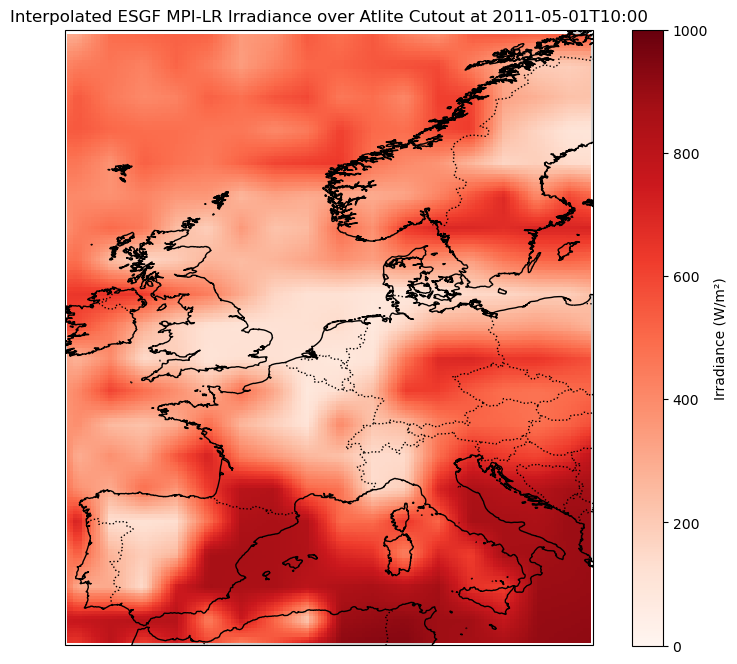

In [22]:
# --- Step 2: Plot the Interpolated Irradiance ---
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Reduce resolution by selecting every Nth point
ds_small = irradiance_on_cutout.coarsen(lat=2, lon=2, boundary='trim').mean()

# Plot the sorted irradiance data
# Plot the sorted irradiance data with fixed colorbar range
ds_small.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='Reds',
    vmin=0,   # Minimum irradiance value
    vmax=1000,  # Maximum irradiance value set to 1000 W/m²
    cbar_kwargs={'label': 'Irradiance (W/m²)'}
)


# --- Step 3: Add Geographic Features ---
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# --- Step 4: Set Map Extent to the Cutout Region ---
bounds = cutout.grid.total_bounds  # Get cutout boundaries
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]], crs=ccrs.PlateCarree())

# --- Step 5: Final Plot Settings ---
plt.title('Interpolated ESGF MPI-LR Irradiance over Atlite Cutout at 2011-05-01T10:00')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()